In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') #to ignore warning while visualization

In [2]:
df= pd.read_csv(r"C:\Users\amish\Downloads\Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### no missing values

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='count', ylabel='isFraud'>

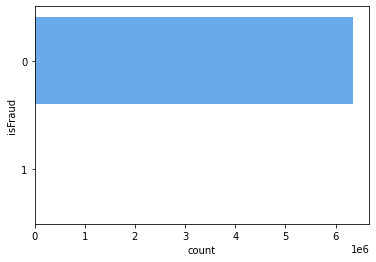

In [8]:
sns.countplot(y = df['isFraud'], palette='cool')

<AxesSubplot:>

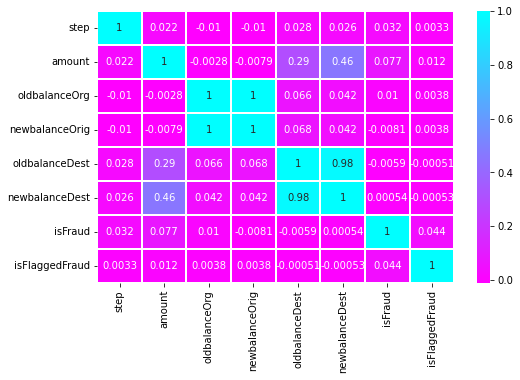

In [9]:
# finding correlation
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='cool_r', linewidth=0.2, annot=True)

###  1.we can see that oldbalanceOrg and newbalanceOrig are highely coorelated to remove multicollienearity, VIF can be used


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [11]:
X = df.drop(['isFraud'], axis=1)
X_with_const = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)
numeric_features = df.select_dtypes(include=[np.number])

vif = pd.DataFrame()
vif["Features"] = numeric_features.columns
vif["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

print(vif)

         Features         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546


In [12]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
fraud = df[df['isFraud'] == 1]


<AxesSubplot:xlabel='step', ylabel='Density'>

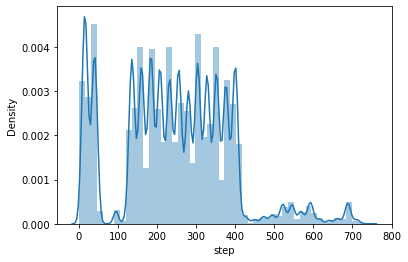

In [14]:
sns.distplot(df['step'])


<AxesSubplot:xlabel='amount', ylabel='Density'>

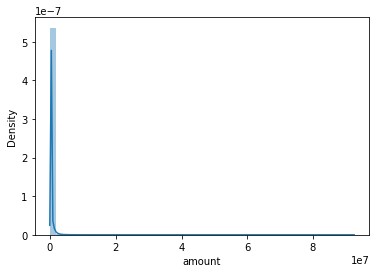

In [15]:
sns.distplot(df['amount'])

<AxesSubplot:xlabel='amount', ylabel='Density'>

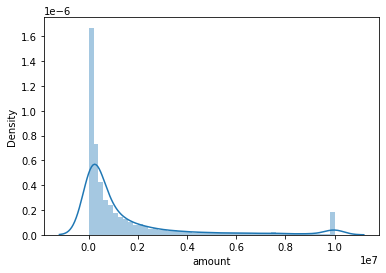

In [16]:
sns.distplot(fraud['amount'])

### apply scaling to handle outlier

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)


## Encoding the variable

In [19]:
types = pd.get_dummies(df['type'], prefix='type', drop_first=True)
types.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [20]:
label = LabelEncoder()
df['nameOrig'] = label.fit_transform(df['nameOrig'])
df['nameDest'] = label.fit_transform(df['nameDest'])

In [21]:
df[['nameOrig', 'nameDest']]

,nameOrig,nameDest
0,757869,1662094
1,2188998,1733924
2,1002156,439685
3,5828262,391696
4,3445981,828919
...,...,...
6362615,5651847,505863
6362616,1737278,260949
6362617,533958,108224
6362618,2252932,319713


In [22]:
df = pd.concat([df, types], axis=1)
df = df.drop('type', axis=1)
df.head()

,step,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NormalizedAmount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,-0.281560,0,0,1,0
1,1,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,-0.294767,0,0,1,0
2,1,1002156,181.0,0.00,439685,0.0,0.0,1,0,-0.297555,0,0,0,1
3,1,5828262,181.0,0.00,391696,21182.0,0.0,1,0,-0.297555,1,0,0,0
4,1,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,-0.278532,0,0,1,0


 #### 3.All variable contribute to model performance thus all should br kept.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [24]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [26]:
print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)


Shape of X_train:  (5090096, 13)
Shape of X_test:  (1272524, 13)


2.(a)
A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. In the context of fraud detection, it is typically used for binary classification where the goal is to identify whether a transaction is fraudulent (1) or not (0).

In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
Y_pred_dt = decision_tree.predict(x_test)

In [29]:
Y_pred_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
decision_tree_score = decision_tree.score(x_test, y_test) * 100
decision_tree_score

99.96950941593244

2(b).
Random Forest is an ensemble learning method that combines multiple Decision Trees to make predictions. It is particularly effective in fraud detection due to its ability to reduce overfitting and improve generalization.

#### 4.Demonstrating the performance of the model 

In [35]:
from sklearn.metrics import classification_report

In [37]:
report_1 = classification_report(y_test, Y_pred_dt)
print("Classification Report:\n", report_1)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270917
           1       0.88      0.87      0.88      1607

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



##### 5.What are the key factors that predict fraudulent customer?

1.The source of request is secured or not ?

2.Is the name of organisation asking for money is legit?
     
3.Transaction history of vendors.

##### 6. Do these factors make sense? If yes, How? If not, How not
Yes, these factors make sense in the context of the fraud detection project. Real-time transaction monitoring helps identify suspicious activities as they occur, improving fraud detection. Stronger authentication methods add a layer of security, making it harder for unauthorized access. Employee training ensures staff are vigilant and capable of recognizing fraudulent patterns, bolstering the overall prevention efforts.


##### 7.What kind of prevention should be adopted while the company updates its infrastructure
During infrastructure updates, the company should prioritize implementing real-time transaction monitoring, strengthening authentication protocols, and enhancing employee training on fraud detection and prevention.

##### 8.Assuming these actions have been implemented, how would you determine if they work:
To assess the effectiveness of fraud prevention measures, you can:

1.Continuously monitor the rate of detected fraudulent transactions.

2.Track false positives to ensure they are minimized.

3.Evaluate the financial impact of fraud reduction.

4.Measure customer satisfaction and usability of the updated   infrastructure.